# 1. YOLOv5 받아오기

In [1]:
import os
root_path = os.getcwd()

In [2]:
os.chdir(root_path)

In [3]:
print(os.getcwd())

/aihub/workspace/object_detection


In [4]:
os.chdir(root_path)
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


# 2. Yolov5 사용을 위한 필요 유틸리티 설치

In [5]:
%cd yolov5/
!pip install -r requirements.txt

/aihub/workspace/object_detection/yolov5


# 3. 구글 Dataset 수신 준비
3-1 접속 사이트: https://storage.googleapis.com/openimages/web/index.html

In [6]:
os.chdir(root_path)
# !git clone https://github.com/EscVM/OIDv4_ToolKit.git
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git # 포크 된 OID

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [29]:
os.chdir(root_path)
%cd OIDv4_ToolKit
!pip install -r requirements.txt

/aihub/workspace/object_detection/OIDv4_ToolKit


# 4. 자전거 데이터 다운 받기

In [30]:
!python3 main.py downloader --classes Bicycle "Bicycle helmet" "Stationary bicycle"  --type_csv all -y --multiclasses 1 


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Bicycle', 'Bicycle helmet', 'Stationary bicycle'] together.

------------------------------------Bicycle------------------------------------
    [INFO] | Downloading all images.
    [INFO] | [IN

- yolov5에서 사용할 용도로 데이터 변환

In [31]:
google_label_path = '/aihub/workspace/object_detection/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/Label/05a52ea4aa0c59e6.txt'

In [32]:
open(google_label_path).readlines()

['Stationary bicycle 0.0 153.654462 881.92 677.359968\n']

In [33]:
roboflow_label_path = "/aihub/workspace/object_detection/train/labels/000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.txt"

In [34]:
open(roboflow_label_path).readlines()

['1 0.408 0.30266666666666664 0.104 0.15733333333333333\n',
 '1 0.245 0.424 0.046 0.08']

In [35]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Bicycle_Bicycle helmet_Stationary bicycle
  0%|                                         | 2/18585 [00:00<32:47,  9.45it/s]
Traceback (most recent call last):
  File "convert_annotations.py", line 63, in <module>
    coords = np.asarray([float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])])
ValueError: could not convert string to float: 'helmet'


In [36]:
train_path = '/aihub/workspace/object_detection/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/Label/'
valid_path = '/aihub/workspace/object_detection/OIDv4_ToolKit/OID/Dataset/validation/Bicycle_Bicycle helmet_Stationary bicycle/Label/'
test_path = '/aihub/workspace/object_detection/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Stationary bicycle/Label/'

In [37]:
import glob
train_label = glob.glob(train_path+"/*.txt")
valid_label = glob.glob(valid_path+"/*.txt")
test_label = glob.glob(test_path+"/*.txt")

In [38]:
import re
Bicycle_helmet_pattern = "Bicycle helmet"
Bicycle_helmet_replace = "Bicycle_helmet"
Stationary_bicycle_pattern = "Stationary bicycle"
Stationary_bicycle_replace = "Stationary_bicycle"
for file in train_label:
    with open(os.path.join(train_path, file), 'r') as f:
        text = f.read()
        new_str = re.sub(Bicycle_helmet_pattern, Bicycle_helmet_replace, text)
        new_str = re.sub(Stationary_bicycle_pattern, Stationary_bicycle_replace, new_str)
        # text.replace("Bicycle helmet", "Bicycle_helmet")
    with open(os.path.join(train_path, file), 'w') as f:
        f.write(new_str)

In [45]:
count = 0 
for file in train_label:
    with open(os.path.join(train_path, file), 'r') as f:
        text = f.read()
        # new_str = re.sub(Bicycle_helmet_pattern, Bicycle_helmet_replace, text)
        # text.replace("Bicycle helmet", "Bicycle_helmet")
        print(text)
        count = count+1
        if count == 50:
            break

Bicycle 0.0 117.25061000000001 78.08 213.998243
Bicycle 0.0 161.459834 95.36 236.42318200000003
Bicycle 74.24 171.070327 620.16 616.3658369999999
Bicycle 115.84 136.471596 192.0 215.279551
Bicycle 136.96 157.615227 218.24 221.04612
Bicycle 244.48 178.758858 522.88 365.206247

Bicycle 410.24 124.85888 1023.36 679.35944

Bicycle 426.24 219.37878500000002 655.36 669.010045
Bicycle_helmet 467.2 19.827325 566.4 162.45596999999998

Bicycle 319.36 462.08025599999996 456.96 647.04

Bicycle 221.599744 324.990732 382.39948799999996 436.255622
Bicycle 557.599744 318.58675199999993 707.9997440000001 425.849666

Bicycle 350.999552 441.99972599999995 606.999552 611.00004
Bicycle 538.999808 446.999976 796.99968 621.9999120000001

Bicycle 212.49243 0.0 497.309103 979.2

Bicycle 21.12 0.0 997.76 678.0

Bicycle 694.4 304.65760800000004 919.04 530.5909350000001
Bicycle 499.2 239.374224 622.08 440.985636

Bicycle 125.44 0.0 1023.147008 682.14625

Bicycle 526.08 234.50122000000002 638.08 422.22991699999994

In [46]:
for file in valid_label:
    with open(os.path.join(valid_path, file), 'r') as f:
        text = f.read()
        new_str = re.sub(Bicycle_helmet_pattern, Bicycle_helmet_replace, text)
        new_str = re.sub(Stationary_bicycle_pattern, Stationary_bicycle_replace, new_str)
    with open(os.path.join(valid_path, file), 'w') as f:
        f.write(new_str)

In [47]:
for file in test_label:
    with open(os.path.join(test_path, file), 'r') as f:
        text = f.read()
        new_str = re.sub(Bicycle_helmet_pattern, Bicycle_helmet_replace, text)
        new_str = re.sub(Stationary_bicycle_pattern, Stationary_bicycle_replace, new_str)
    with open(os.path.join(test_path, file), 'w') as f:
        f.write(new_str)

In [48]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Bicycle_Bicycle helmet_Stationary bicycle
100%|█████████████████████████████████████| 18585/18585 [13:19<00:00, 23.26it/s]
Currently in subdirectory: validation
Converting annotations for class:  Bicycle_Bicycle helmet_Stationary bicycle
100%|█████████████████████████████████████████| 269/269 [00:07<00:00, 34.02it/s]
Currently in subdirectory: test
Converting annotations for class:  Bicycle_Bicycle helmet_Stationary bicycle
100%|█████████████████████████████████████████| 782/782 [00:22<00:00, 34.03it/s]


- 경로정리

In [49]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory. ' + directory)

In [50]:
os.chdir(root_path)
createFolder("google_imamge_dataset")
createFolder(root_path+"/google_imamge_dataset/images/train")
createFolder(root_path+"/google_imamge_dataset/images/valid")
createFolder(root_path+"/google_imamge_dataset/images/test")

createFolder(root_path+"/google_imamge_dataset/labels/train")
createFolder(root_path+"/google_imamge_dataset/labels/valid")
createFolder(root_path+"/google_imamge_dataset/labels/test")

# 4. AI 가 학습 할 수 있도록 경로 정리
- Yolo 에 맞게 경로 이동


In [57]:
train_path = root_path+"/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle"
valid_path = root_path+"/OIDv4_ToolKit/OID/Dataset/validation/Bicycle_Bicycle helmet_Stationary bicycle"
test_path = root_path+"/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Stationary bicycle"

In [58]:
import shutil
import glob
import os

In [60]:
list_images = glob.glob(train_path + '/*.jpg')
list_text = glob.glob(train_path + '/*.txt')

for file in list_images:
    shutil.copy(file, root_path+"/google_imamge_dataset/images/train")
for file in list_text:
    shutil.copy(file, root_path+"/google_imamge_dataset/labels/train")

## 4-1. Validation Data와 Test Data를 복사  
- (실습 - 다른 방식으로도 해보는걸 추천 드립니다.)


In [61]:
list_images = glob.glob(valid_path + '/*.jpg')
list_text = glob.glob(valid_path + '/*.txt')

for file in list_images:
    shutil.copy(file, root_path+"/google_imamge_dataset/images/valid")
for file in list_text:
    shutil.copy(file, root_path+"/google_imamge_dataset/labels/valid")

In [62]:
list_images = glob.glob(test_path + '/*.jpg')
list_text = glob.glob(test_path + '/*.txt')

for file in list_images:
    shutil.copy(file, root_path+"/google_imamge_dataset/images/test")
for file in list_text:
    shutil.copy(file, root_path+"/google_imamge_dataset/labels/test")

In [63]:

os.chdir(root_path)
#viewing the data.yaml
%cat google_image_data.yaml

train: /aihub/workspace/object_detection/google_imamge_dataset/images/train/
val: /aihub/workspace/object_detection/google_imamge_dataset/images/valid/
nc: 3
names:
- Bicycle
- Bicycle_helmet
- Stationary_bicycle


- 학습을 위한 라벨지정 및 image 폴더 지정

In [64]:
os.chdir(root_path)
f = open("google_image_data.yaml", 'w+', encoding="UTF8")
f.write("train: /aihub/workspace/object_detection/google_imamge_dataset/images/train/\n")
f.write("val: /aihub/workspace/object_detection/google_imamge_dataset/images/valid/\n")
f.write("nc: 3\n")
f.write("names:\n")
f.write("- Bicycle\n")
f.write("- Bicycle_helmet\n")
f.write("- Stationary_bicycle\n")
f.close()

In [73]:
# define number of classes based on YAML
import yaml
with open("google_image_data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [74]:
#see the number of classes
num_classes

'3'

In [84]:
train_label_path = glob.glob(root_path+"/google_imamge_dataset/labels/train"+"/*.txt")
valid_label_path = glob.glob(root_path+"/google_imamge_dataset/labels/valid"+"/*.txt")

## 4-3. Train/Validation/Test Data의 Lable 변환 (Text -> 숫자로) 
- (실습 - 다른 방식으로도 해보는걸 추천 드립니다.)

In [86]:
import re
for file_name in train_label_path:
    with open(file_name, 'r+') as f:
        text = f.read()
        text = re.sub('Bicycle_helmet', '1', text)
        text = re.sub('Bicycle', '0', text)
        text = re.sub('Stationary_bicycle', '2', text)
        f.seek(0)
        f.write(text)
        f.truncate()

In [88]:
import re
list_text
for file_name in valid_label_path:
    with open(file_name, 'r+') as f:
        text = f.read()
        text = re.sub('Bicycle_helmet', '1', text)
        text = re.sub('Bicycle', '0', text)
        text = re.sub('Stationary_bicycle', '2', text)
        f.seek(0)
        f.write(text)
        f.truncate()

# 5. Yolov5 를 이용한 학습

In [89]:
%%time
os.chdir(root_path+"/yolov5/")
!python train.py --img 416 --batch 16 --epochs 2 --data '../google_image_data.yaml' --cfg yolov5s.yaml --weights yolov5s.pt --name bicycle_helmet  --cache

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=../google_image_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=bicycle_helmet, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
fatal: unsafe repository ('/aihub/workspace/object_detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /aihub/workspace/object_dete

In [92]:
list_image = glob.glob('/aihub/workspace/object_detection/google_imamge_dataset/images/test/*.jpg')

In [93]:
list_image

['/aihub/workspace/object_detection/google_imamge_dataset/images/test/65f5ed364ac36805.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/7f67f6051d99b447.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/a562c6346ea9e8ad.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/3709914f553c258d.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/187a3f8608717e81.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/76613bdc52e75d47.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/128a8352e0d3944a.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/406811b82cbc182e.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/d5351ef90f49407a.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/5fe26dd6b862a833.jpg',
 '/aihub/workspace/object_detection/google_imamge_dataset/images/test/

In [101]:
from IPython.display import Image
import os
# /aihub/workspace/object_detection/google_imamge_dataset/images/train/
# val_img_path = list_image_change[1]
val_img_path = "/aihub/workspace/object_detection/google_imamge_dataset/images/test/b1845e14ee7ee3f2.jpg"

!python detect.py --weights /aihub/workspace/object_detection/yolov5/runs/train/bicycle_helmet/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"



detect: weights=['/aihub/workspace/object_detection/yolov5/runs/train/bicycle_helmet/weights/best.pt'], source=/aihub/workspace/object_detection/google_imamge_dataset/images/test/b1845e14ee7ee3f2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
Python 3.7.0 required by YOLOv5, but Python 3.6.9 is currently installed
fatal: unsafe repository ('/aihub/workspace/object_detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /aihub/workspace/object_detection/yolov5
YOLOv5 🚀 2022-7-27 Python-3.6.9 torch-1.10.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 la

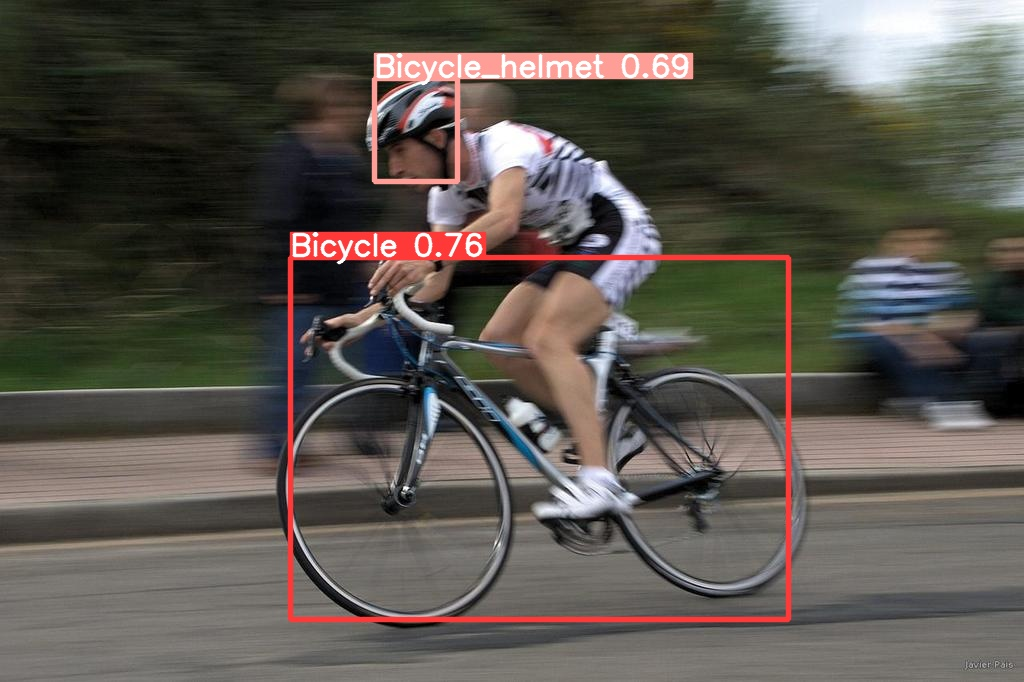

In [103]:
from IPython.display import Image
Image(filename="/aihub/workspace/object_detection/yolov5/runs/detect/exp9/b1845e14ee7ee3f2.jpg") 

In [76]:
%cat /aihub/workspace/object_detection/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [82]:
# %%writetemplate /aihub/workspace/object_detection/yolov5/models/custom_yolov5s.yaml
# # parameters
# nc: {num_classes}  # number of classes
# depth_multiple: 0.33  # model depth multiple
# width_multiple: 0.50  # layer channel multiple

# # anchors
# anchors:
#   - [10,13, 16,30, 33,23]  # P3/8
#   - [30,61, 62,45, 59,119]  # P4/16
#   - [116,90, 156,198, 373,326]  # P5/32

# # YOLOv5 backbone
# backbone:
#   # [from, number, module, args]
#   [[-1, 1, Focus, [64, 3]],  # 0-P1/2
#    [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
#    [-1, 3, BottleneckCSP, [128]],
#    [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
#    [-1, 9, BottleneckCSP, [256]],
#    [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
#    [-1, 9, BottleneckCSP, [512]],
   
#    [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
#    [-1, 1, SPP, [1024, [5, 9, 13]]],
#    [-1, 3, BottleneckCSP, [1024, False]],  # 9
#   ]

# # YOLOv5 head
# head:
#   [[-1, 1, Conv, [512, 1, 1]],
#    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
#    [[-1, 6], 1, Concat, [1]],  # cat backbone P4
#    [-1, 3, BottleneckCSP, [512, False]],  # 13

#    [-1, 1, Conv, [256, 1, 1]],
#    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
#    [[-1, 4], 1, Concat, [1]],  # cat backbone P3
#    [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

#    [-1, 1, Conv, [256, 3, 2]],
#    [[-1, 14], 1, Concat, [1]],  # cat head P4
#    [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

#    [-1, 1, Conv, [512, 3, 2]],
#    [[-1, 10], 1, Concat, [1]],  # cat head P5
#    [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

#    [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
#   ]

UsageError: Cell magic `%%writetemplate` not found.
